In [1]:
import numpy as np
import matplotlib.pyplot as plt

def createTrainDatasWithNoise(W, start, end, size = 10, noise = 0.1):
    """
    创建带噪声的训练数据集
    args:
        W - 目标权重系数
        start - 最小值
        end - 最大值
        size - 训练数据集大小
        noise - 噪音大小
    return:
        X - 训练集特征值
        y - 训练集目标值
    """
    np.random.seed(42)
    X = np.random.uniform(start, end, (size, W.shape[0]))
    y = []
    for index in range(len(X)):
        num = np.random.randint(start, end)
        if np.random.random() > noise:
            y.append(X[index].dot(W))
        elif (num % 2) == 0:
            y.append(X[index].dot(W) + num)
        else:
            y.append(X[index].dot(W) - num)
    return X, np.array(y)

def buildSurface(W, start, end):
    """
    构建一个指定的二维平面
    args:
        W - 权重系数
        start - 最小值
        end - 最大值
        size - 组成线的点的数量
    return:
        x1 - x1集合
        y1 - y1集合
        z1 - z1集合
    """
    xx = np.arange(start, end, 0.5)
    yy = np.arange(start, end, 0.5)
    x1, y1 = np.meshgrid(xx, yy)
    z1 = W[0] * x1 + W[1] * y1
    return x1, y1, z1

In [2]:
import numpy as np

def calcCost(X, y, W):
    return np.sum(np.square(X.dot(W) - y))

In [3]:
W = np.array([2000])
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1598, 3898, 6220, 7799, 10510])

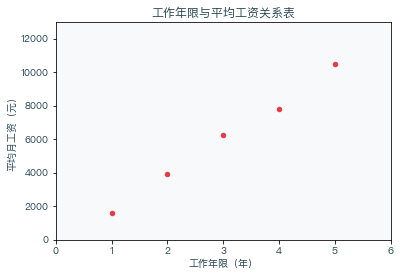

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax1 = plt.subplots()
ax1.set_facecolor('#f8f9fa')

x1 = X[:][:, 0]
y1 = y
ax1.scatter(x1, y1, marker='o', s=20, c='#e63946')
ax1.set_title('工作年限与平均工资关系表', color='#264653')
ax1.set_xlabel('工作年限（年）', color='#264653')
ax1.set_ylabel('平均月工资（元）', color='#264653')
ax1.tick_params(labelcolor='#264653')
plt.xlim(0 , 6 )
plt.ylim(0 , 13000 )
plt.show()

<IPython.core.display.Javascript object>


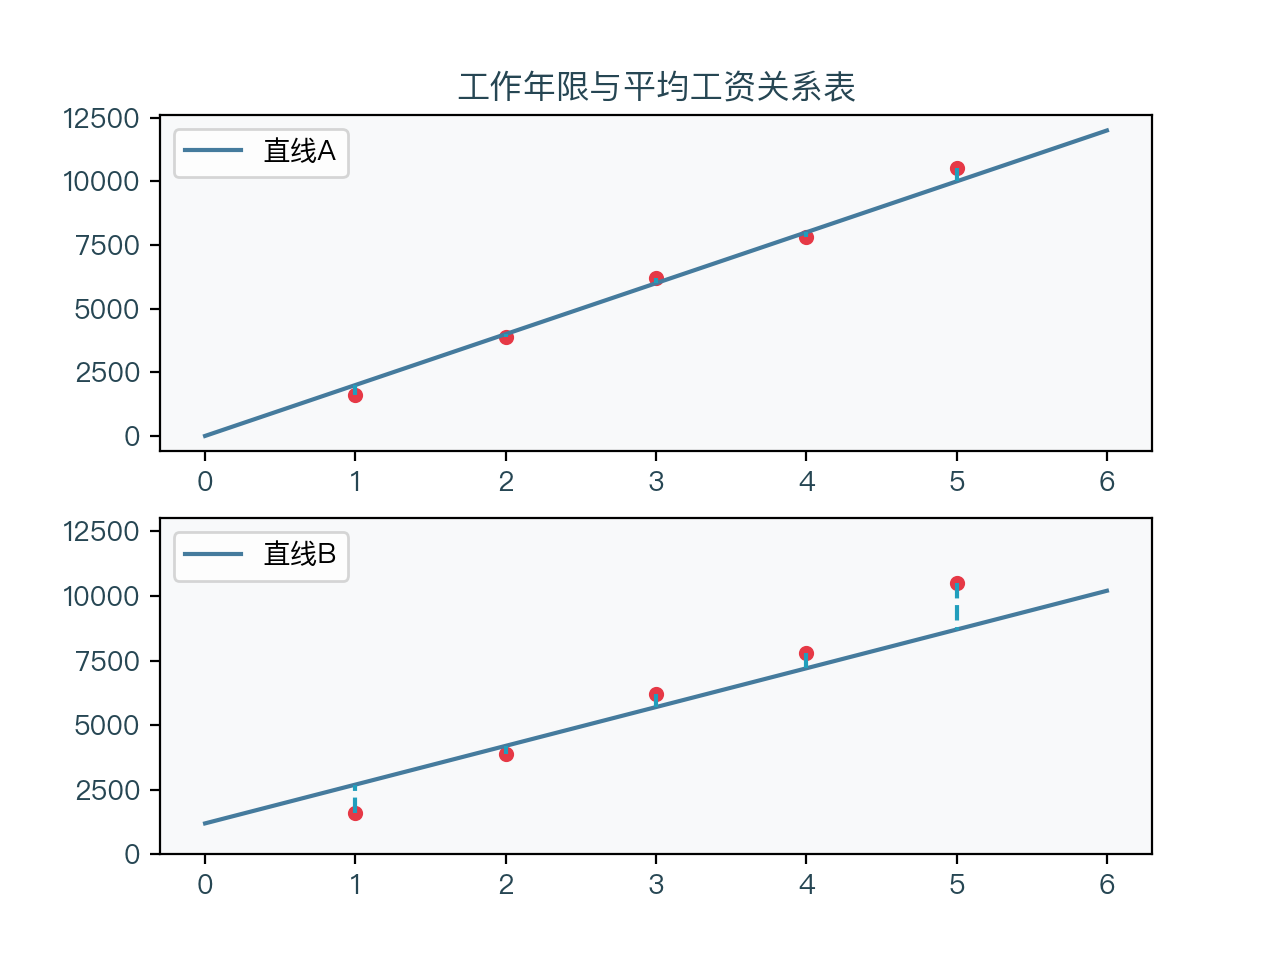

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, axs = plt.subplots(2,1)
ax1 = axs[0]
ax2 = axs[1]
ax1.set_facecolor('#f8f9fa')
ax2.set_facecolor('#f8f9fa')

W = np.array([2000])
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1598, 3898, 6220, 7799, 10510])

x1 = X[:][:, 0]
y1 = y
ax1.scatter(x1, y1, marker='o', s=20, c='#e63946')
x2 = np.linspace(0, 6, 100)
y2 = W[0] * x2
ax1.plot(x2, y2, '#457b9d', label='直线A')
x3 = np.linspace(0, 6, 100)
y3 = 1500 * x3 + 1200
ax2.scatter(x1, y1, marker='o', s=20, c='#e63946')
ax2.plot(x3, y3, '#457b9d', label='直线B')
for i in range(len(x1)):
    ax1.plot(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], W[0] * x1[i], 100), '#219ebc', linestyle='--')
    ax2.plot(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], 1500 * x1[i] + 1200, 100), '#219ebc', linestyle='--')
ax1.set_title('工作年限与平均工资关系表', color='#264653')
ax1.tick_params(labelcolor='#264653')
ax1.legend(loc="upper left")
ax2.tick_params(labelcolor='#264653')
ax2.legend(loc="upper left")
plt.ylim(0 , 13000 )
plt.show()

创建带噪声的数据集：

In [6]:
# 坐标轴起始点
start = -10
# 坐标轴结束点
end = 10
# 目标权重系数
W = np.array([2])
# 创建线性可分的训练数据集
X, y = createTrainDatasWithNoise(W, start, end, 10, 0.4)

计算标准代价值：

In [7]:
calcCost(X, y, W)

168.0

可视化：

<IPython.core.display.Javascript object>


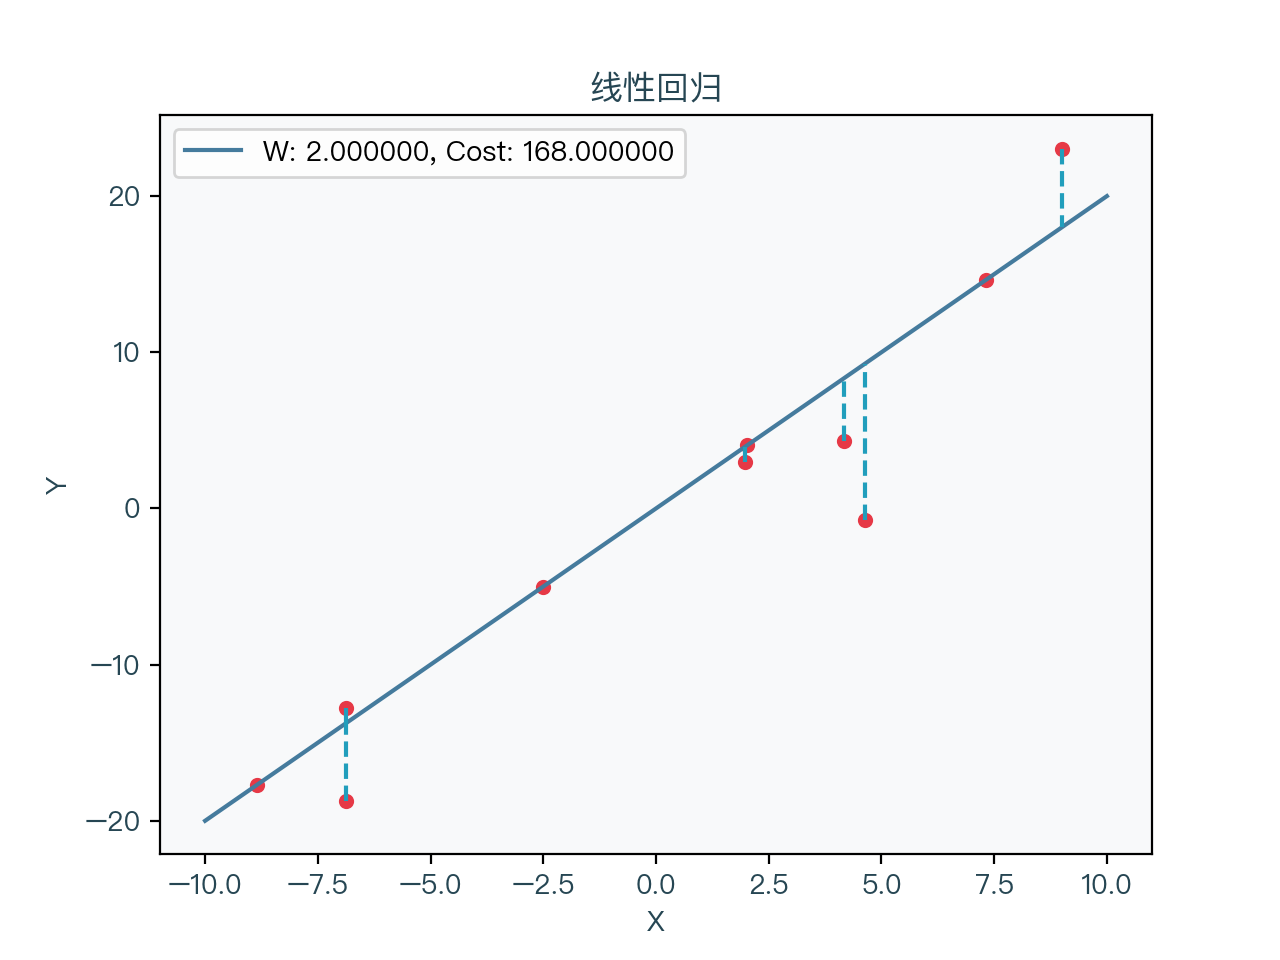

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x1 = X[:][:, 0]
y1 = y
ax.scatter(x1, y1, marker='o', s=20, c='#e63946')
x2 = np.linspace(start, end, 100)
y2 = W[0] * x2
ax.plot(x2, y2, '#457b9d', label='W: %f, Cost: %f'%(W[0], calcCost(X, y, W)))
for i in range(len(x1)):
    ax.plot(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], W[0] * x1[i], 100), '#219ebc', linestyle='--')
ax.set_title('线性回归', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend(loc="upper left")
plt.show()

<IPython.core.display.Javascript object>


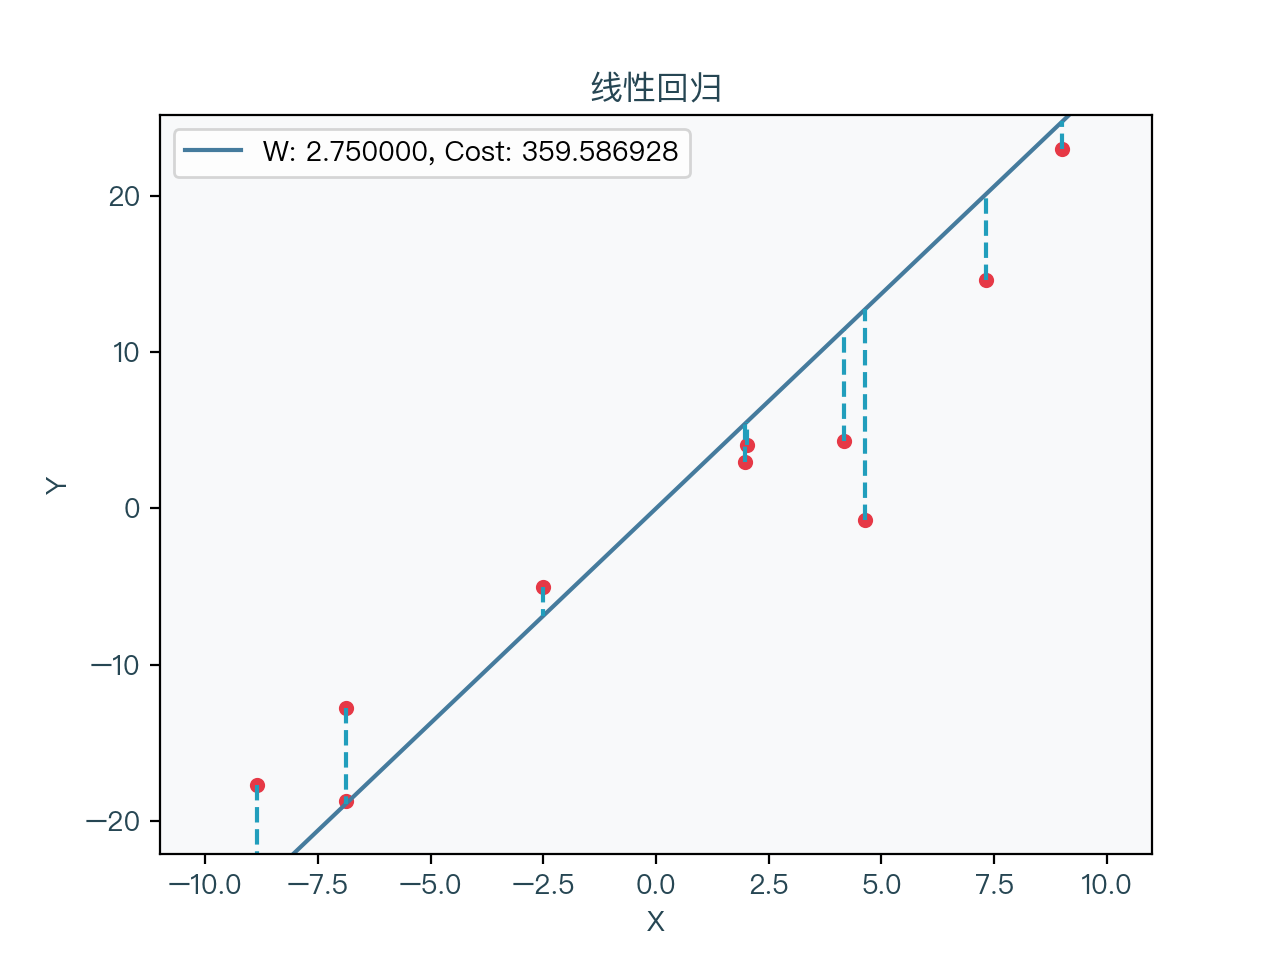

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

Ws = np.arange(-2, 3, 0.25)
x1 = X[:][:, 0]
y1 = y
ax.scatter(x1, y1, marker='o', s=20, c='#e63946')
x2 = np.linspace(start, end, 100)
y2 = Ws[0] * x2
line, = ax.plot(x2, y2, '#457b9d', label='W: %f, Cost: %f'%(Ws[0], calcCost(X, y, [Ws[0]])))
verticals = np.array([])
for i in range(len(x1)):
    vertical, = ax.plot(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], Ws[0] * x1[i], 100), '#219ebc', linestyle='--');
    verticals = np.append(verticals, vertical)
ax.set_title('线性回归', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.tick_params(labelcolor='#264653')

def update(i):
    x3 = np.linspace(start, end, 100)
    y3 = Ws[i] * x2
    line.set_data(x3, y3)
    line.set_label('W: %f, Cost: %f'%(Ws[i], calcCost(X, y, [Ws[i]])))
    for j in range(len(x1)):
        vertical = verticals[j]
        vertical.set_data(np.linspace(x1[j], x1[j], 100), np.linspace(y1[j], Ws[i] * x1[j], 100))
    plt.legend(loc="upper left")
    return line,

ani = animation.FuncAnimation(fig, update, range(0, len(Ws)), interval=500, blit=True, repeat=False)
ani.save('linear_simple.gif')
plt.legend(loc="upper left")
plt.show()

使用 Python 实现线性回归算法：

In [10]:
def linear(X, y):
    """
    线性回归
    args:
        X - 训练数据集
        y - 目标标签值
    return:
        W - 权重系数
    """
    return np.linalg.pinv(X).dot(y)

计算权重系数：

In [11]:
W = linear(X, y)
W

array([2.02099399])

计算代价值：

In [12]:
calcCost(X, y, W)

167.84097919294084

可视化：

<IPython.core.display.Javascript object>


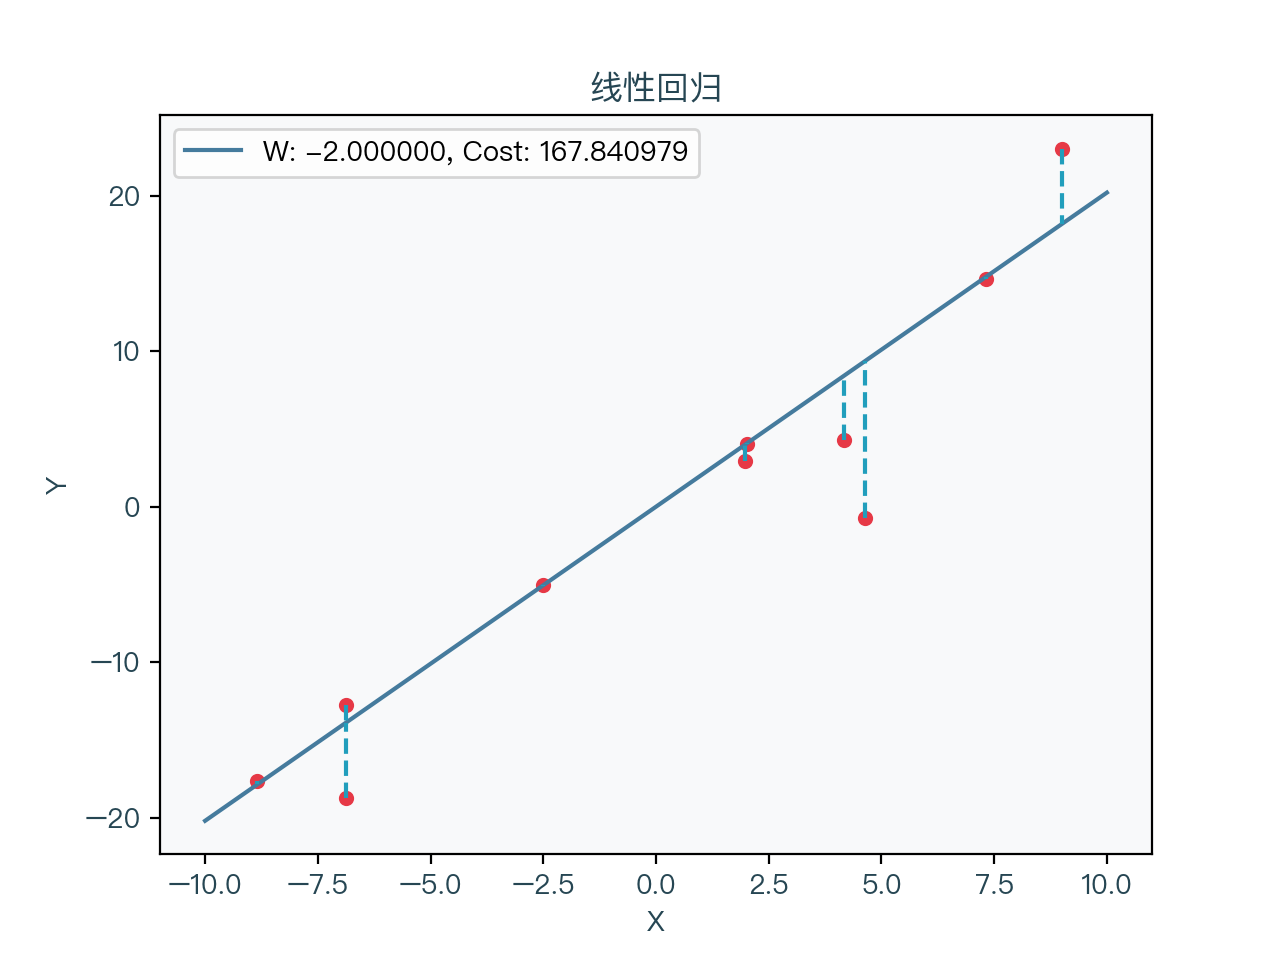

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x1 = X[:][:, 0]
y1 = y
ax.scatter(x1, y1, marker='o', s=20, c='#e63946')
x2 = np.linspace(start, end, 100)
y2 = W[0] * x2
ax.plot(x2, y2, '#457b9d', label='W: %f, Cost: %f'%(Ws[0], calcCost(X, y, W)))
for i in range(len(x1)):
    ax.plot(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], W[0] * x1[i], 100), '#219ebc', linestyle='--')
ax.set_title('线性回归', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend(loc="upper left")
plt.show()

使用 scikit-learn 拟合：

In [14]:
from sklearn.linear_model import LinearRegression

# 初始化线性回归器
lin = LinearRegression(fit_intercept=False)
# 拟合线性模型
lin.fit(X, y)
# 权重系数
W = lin.coef_
W

array([2.02099399])

可视化：

<IPython.core.display.Javascript object>


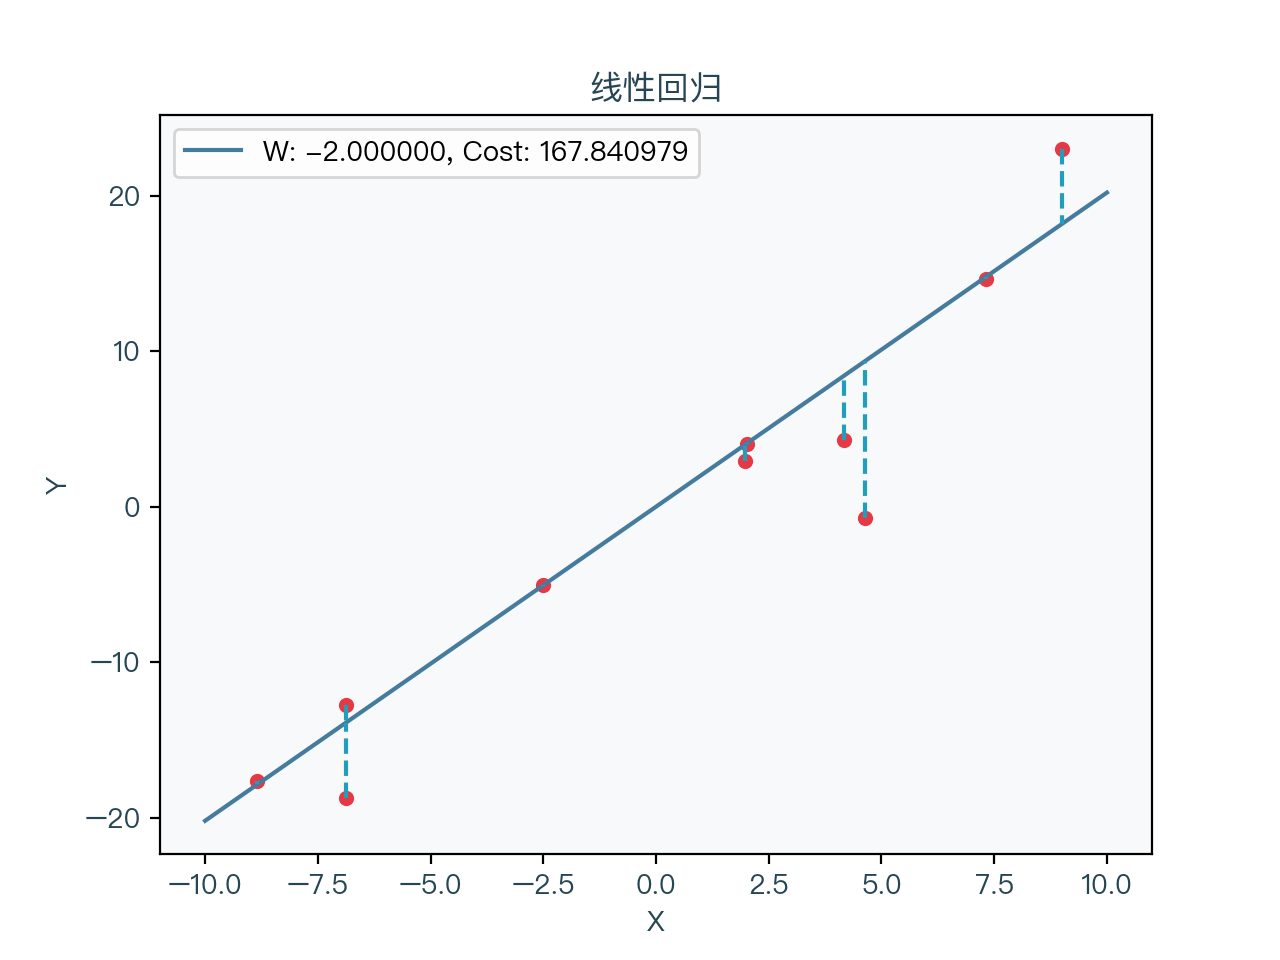

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x1 = X[:][:, 0]
y1 = y
ax.scatter(x1, y1, marker='o', s=20, c='#e63946')
x2 = np.linspace(start, end, 100)
y2 = W[0] * x2
ax.plot(x2, y2, '#457b9d', label='W: %f, Cost: %f'%(Ws[0], calcCost(X, y, W)))
for i in range(len(x1)):
    ax.plot(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], W[0] * x1[i], 100), '#219ebc', linestyle='--')
ax.set_title('线性回归', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend(loc="upper left")
plt.show()

初始化复杂带噪声的数据集：

In [16]:
# 坐标轴起始点
start = -10
# 坐标轴结束点
end = 10
# 目标权重系数
W = np.array([1, -2])
# 创建线性可分的训练数据集
X, y = createTrainDatasWithNoise(W, start, end, 200, 0.2)

计算标准代价值：

In [17]:
calcCost(X, y, W)

1676.0

可视化：

<IPython.core.display.Javascript object>


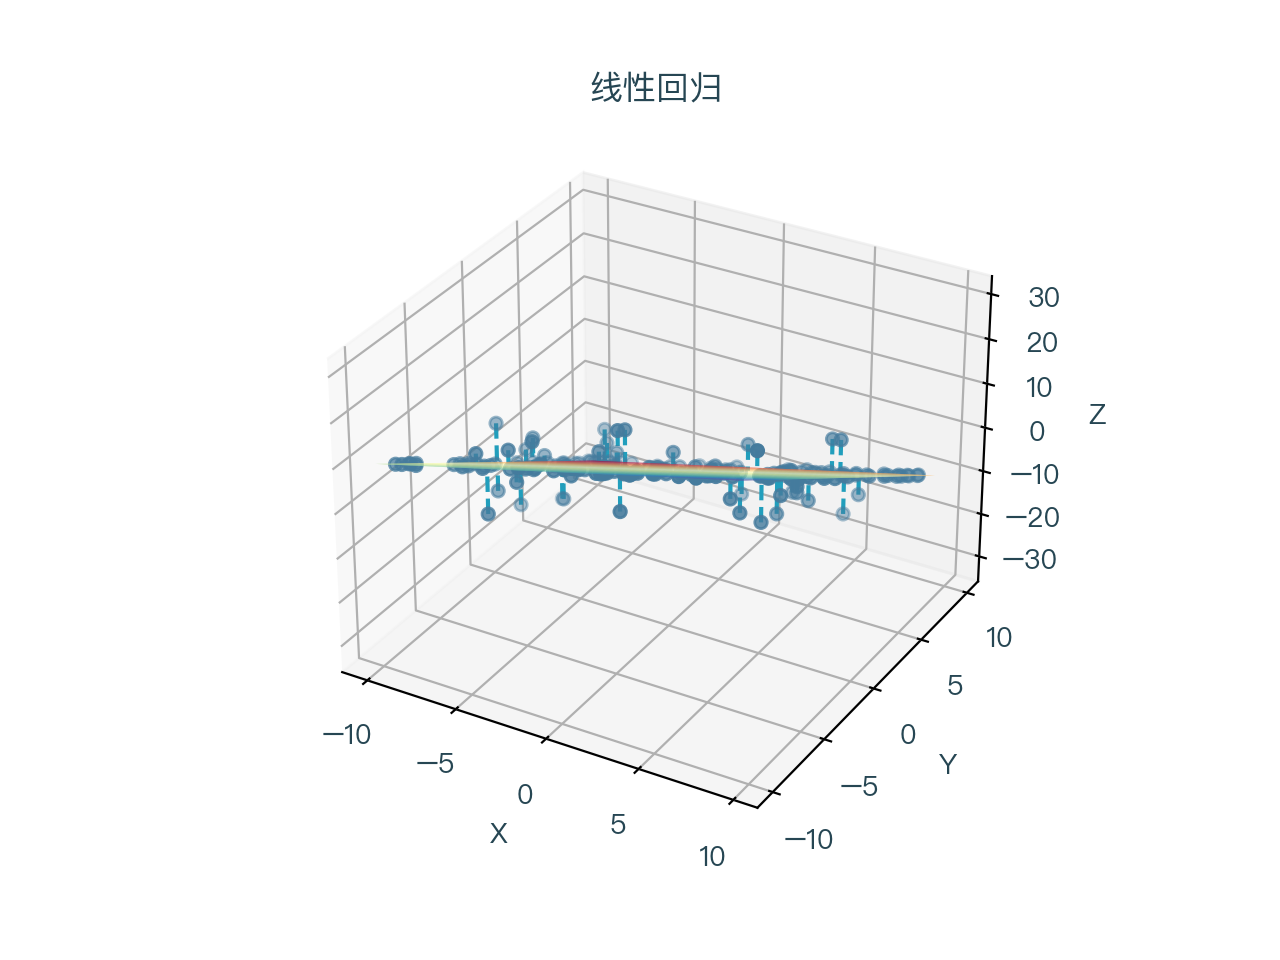

In [18]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

%matplotlib notebook

x1 = X[:][:, 0]
y1 = X[:][:, 1]
z1 = y
ax = plt.axes(projection='3d')
ax.scatter3D(x1, y1, z1, c='#457b9d')
x2, y2, z2 = buildSurface(W, start, end)
ax.plot_surface(x2, y2, z2, cmap='Spectral')
for i in range(len(x1)):
    ax.plot3D(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], y1[i], 100), np.linspace(z1[i], W[0] * x1[i] + W[1] * y1[i], 100), '#219ebc', linestyle='--')
ax.set_title('线性回归', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.set_zlabel('Z', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.show()

计算权重系数：

In [19]:
W = linear(X, y)
W

array([ 0.97420586, -2.01757239])

In [20]:
calcCost(X, y, W)

1668.8584122775746

可视化：

<IPython.core.display.Javascript object>


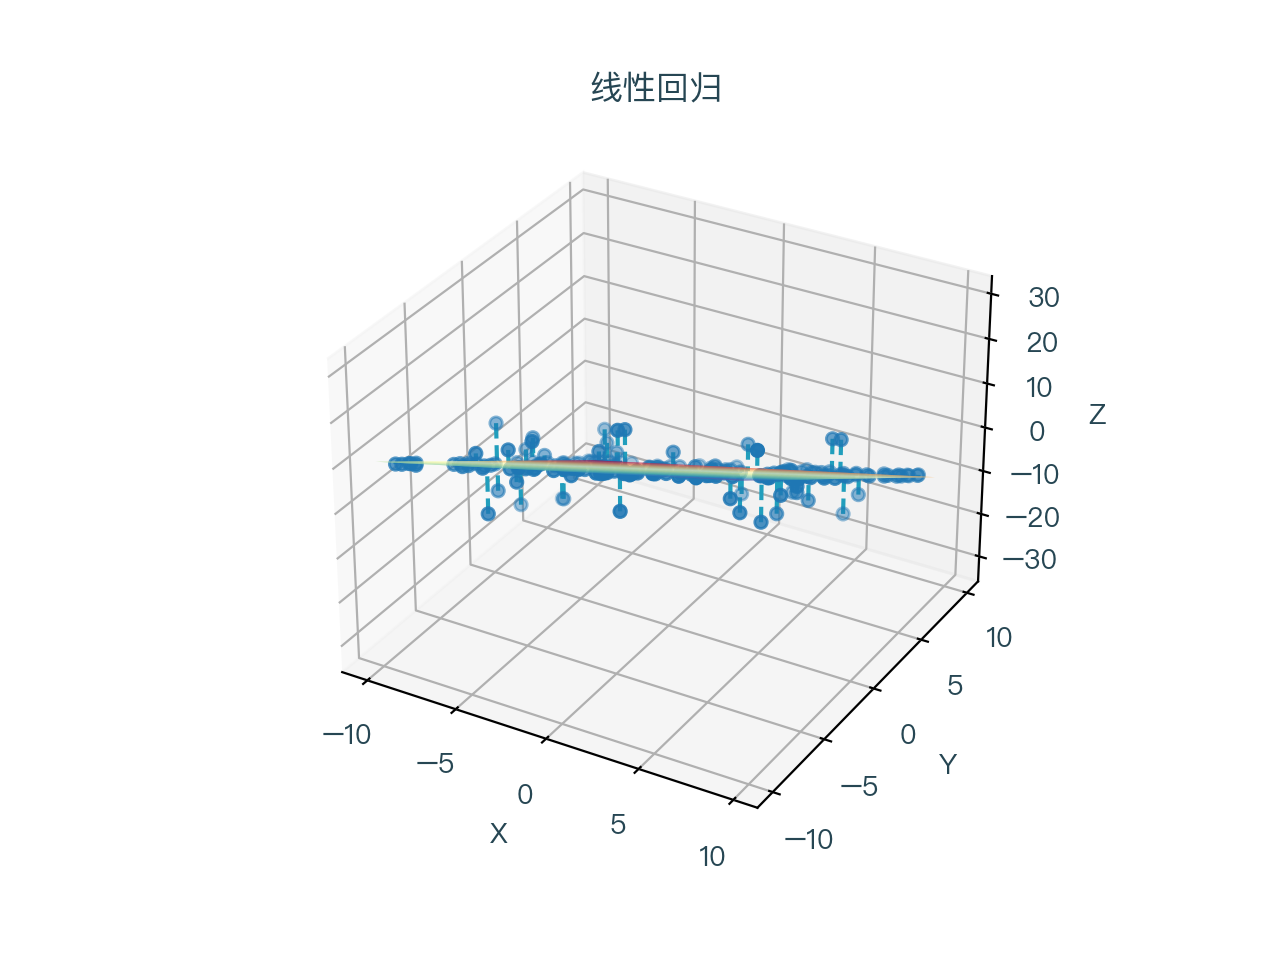

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

%matplotlib notebook

x1 = X[:][:, 0]
y1 = X[:][:, 1]
z1 = y
ax = plt.axes(projection='3d')
ax.scatter3D(x1, y1, z1)
x2, y2, z2 = buildSurface(W, start, end)
ax.plot_surface(x2, y2, z2, cmap='Spectral')
for i in range(len(x1)):
    ax.plot3D(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], y1[i], 100), np.linspace(z1[i], W[0] * x1[i] + W[1] * y1[i], 100), '#219ebc', linestyle='--')
ax.set_title('线性回归', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.set_zlabel('Z', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.show()

使用 scikit-learn 拟合：

In [22]:
from sklearn.linear_model import LinearRegression

# 初始化线性回归器
lin = LinearRegression(fit_intercept=False)
# 拟合线性模型
lin.fit(X, y)
# 权重系数
W = lin.coef_
W

array([ 0.97420586, -2.01757239])

<IPython.core.display.Javascript object>


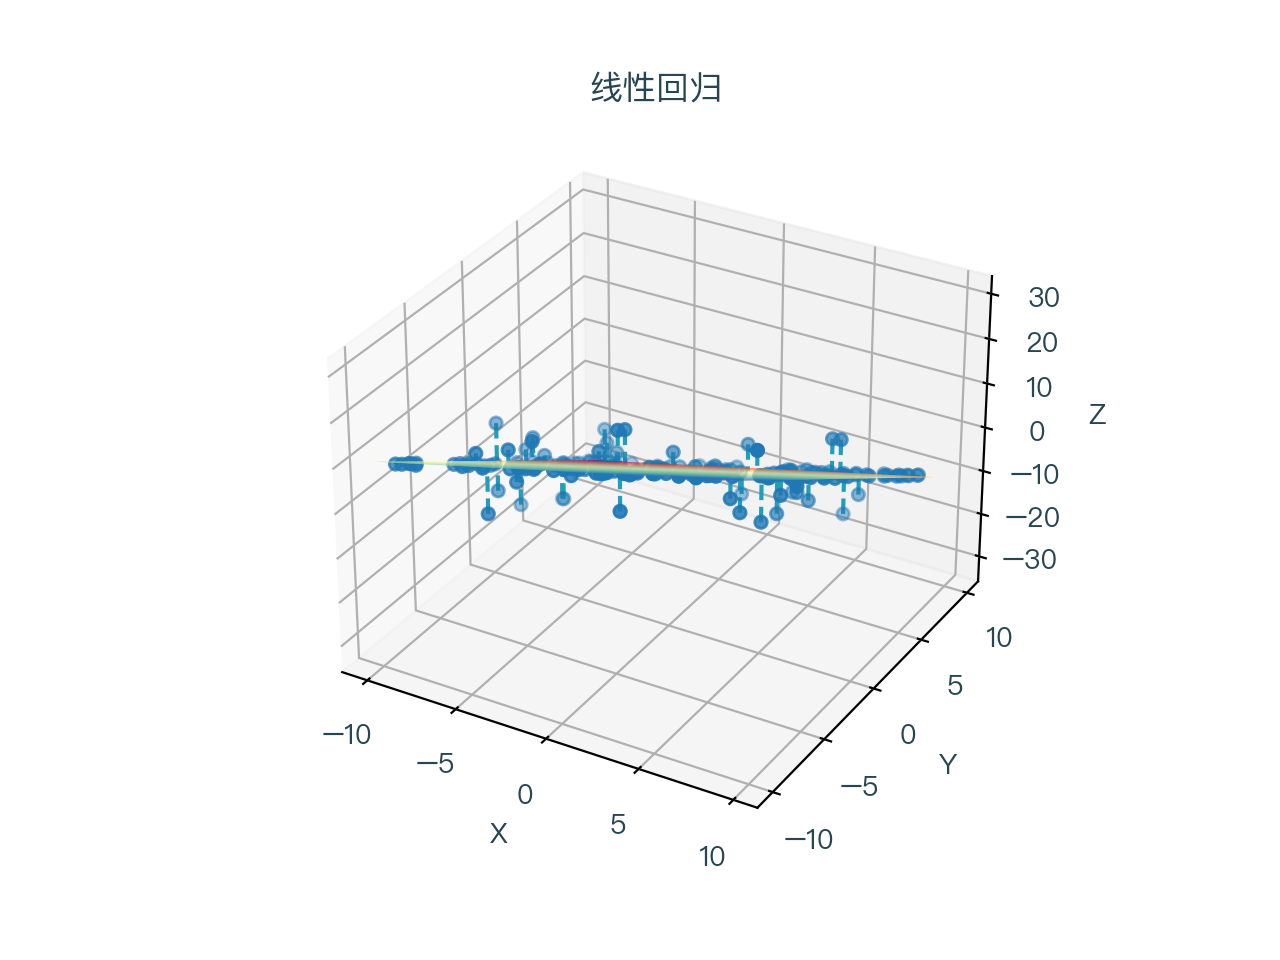

In [23]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体

%matplotlib notebook

x1 = X[:][:, 0]
y1 = X[:][:, 1]
z1 = y
ax = plt.axes(projection='3d')
ax.scatter3D(x1, y1, z1)
x2, y2, z2 = buildSurface(W, start, end)
ax.plot_surface(x2, y2, z2, cmap='Spectral')
for i in range(len(x1)):
    ax.plot3D(np.linspace(x1[i], x1[i], 100), np.linspace(y1[i], y1[i], 100), np.linspace(z1[i], W[0] * x1[i] + W[1] * y1[i], 100), '#219ebc', linestyle='--')
ax.set_title('线性回归', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.set_zlabel('Z', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.show()